# Forest Fires Dataset Exploration

In [2]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.colors as c1
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

Importing all the packages to be used

# 2(a)

In [3]:
ff=pd.read_csv('forestfires.csv')

#ff=ff.replace(({'month':{ "jan":1, "feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}}))
#ff=ff.replace(({'day':{"sun":1,"mon":2,"tue":3,"wed":4,"thu":5,"fri":6,"sat":7}}))
ff.X=ff.X.astype('object')
ff.Y=ff.Y.astype('object')
print('2(a) Downloaded Dataset and loaded on the Jupyter Notebook')

2(a) Downloaded Dataset and loaded on the Jupyter Notebook


# 2(b)

In [4]:
ff.shape[0]
print("2(b).i The number of rows in the  dataset is {0}".format(ff.shape[0]))

2(b).i The number of rows in the  dataset is 517


In [5]:
ff.shape[1]
print("2 (b).i The number of columns in the  dataset is {0}".format(ff.shape[1]))

2 (b).i The number of columns in the  dataset is 13


2(b).i The rows represent instances of forest fires which have occured and columns are the attributes (or) features of the forest fires.

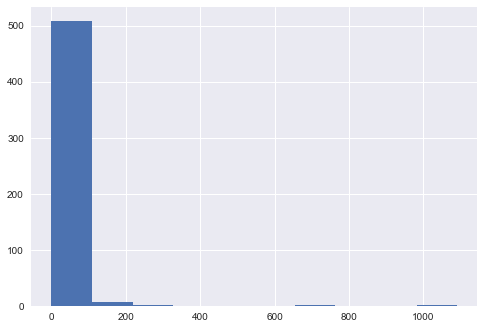

2(b).ii As we can see in the plot above most of the data is zero or close to zero.If we use the logarithm then the dataset can be normalized.


In [6]:
plt.hist(ff.area)
plt.show()
ff.area=np.log(ff.area+1)
print("2(b).ii As we can see in the plot above most of the data is zero or close to zero.If we use the logarithm then the dataset can be normalized.")
#plt.hist(ff.area)
#plt.show()

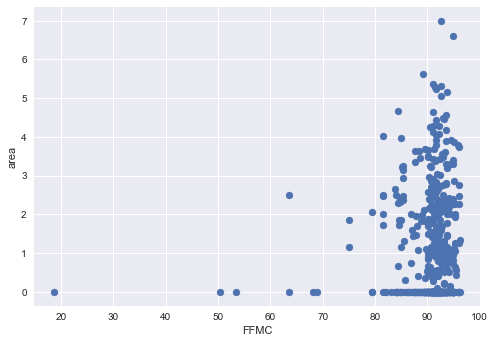

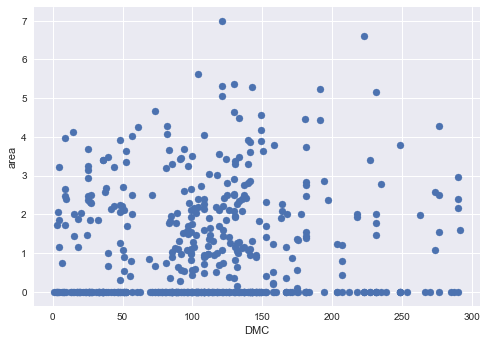

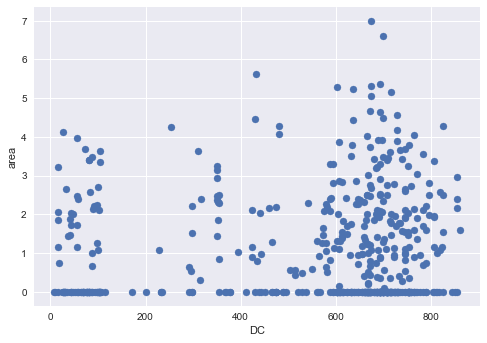

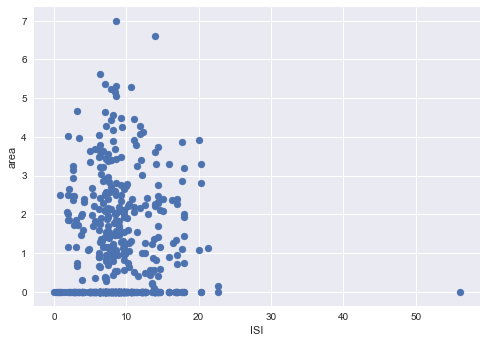

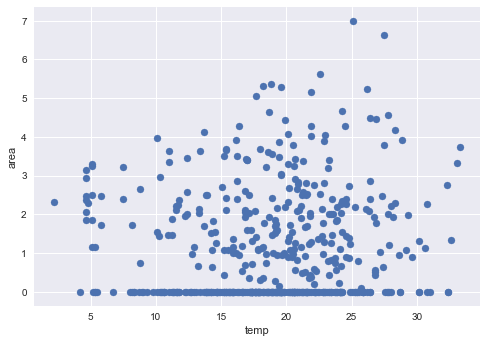

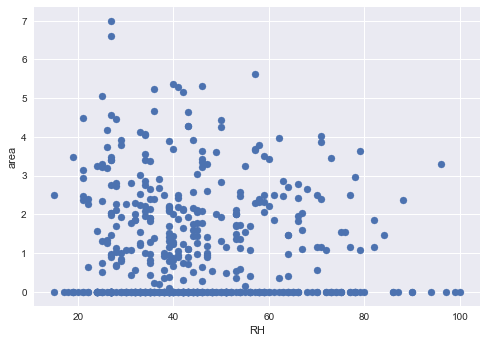

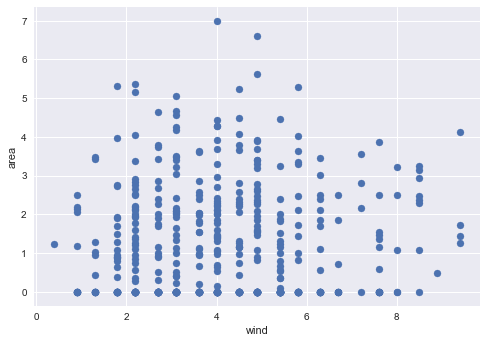

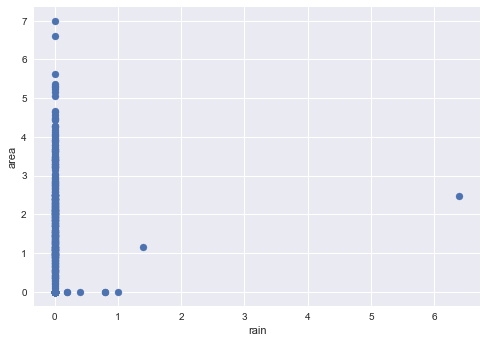

In [7]:
aa=ff.select_dtypes(exclude=['object'])
for i in range(0,aa.shape[1]-1):
    plt.scatter(aa.ix[:,i],aa.area)
    plt.xlabel(aa.columns[i])
    plt.ylabel("area")
    plt.show()

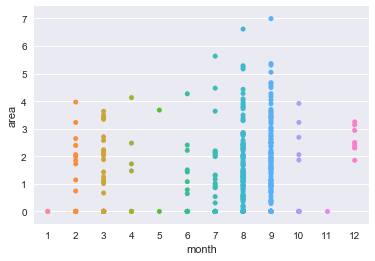

In [23]:
sns.stripplot(x="month",y="area",data=ff)

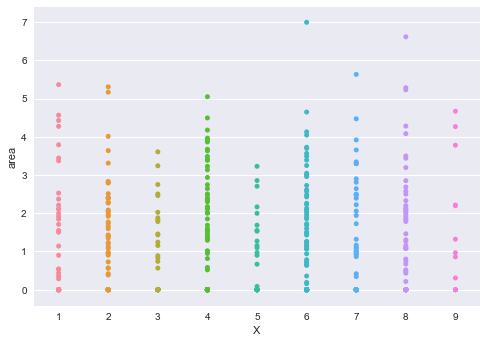

In [4]:
sns.stripplot(x="X",y="area",data=ff)

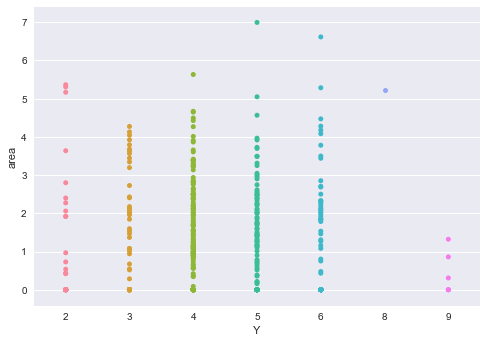

In [5]:
sns.stripplot(x="Y",y="area",data=ff)

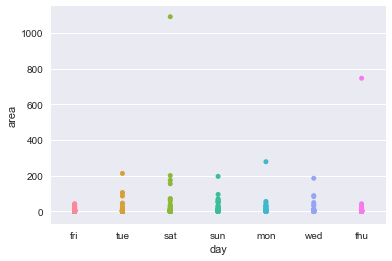

In [37]:
sns.stripplot(x="day",y="area",data=ff)

2 (b).iii The plots of predictor vs response variable.

C:\Users\Abhi\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


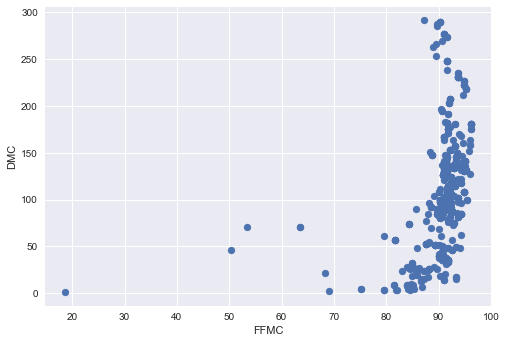

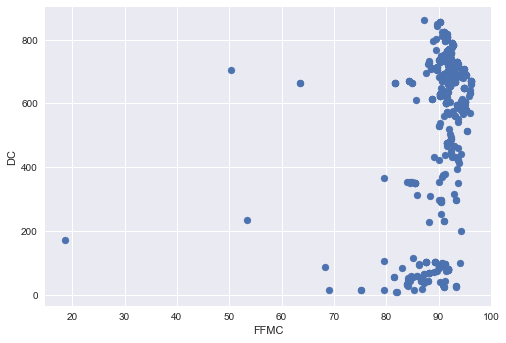

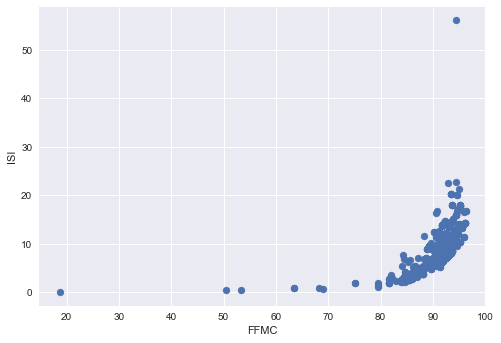

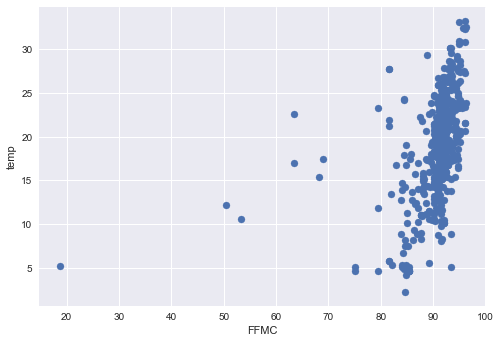

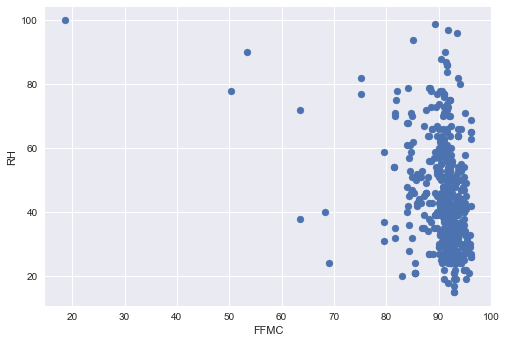

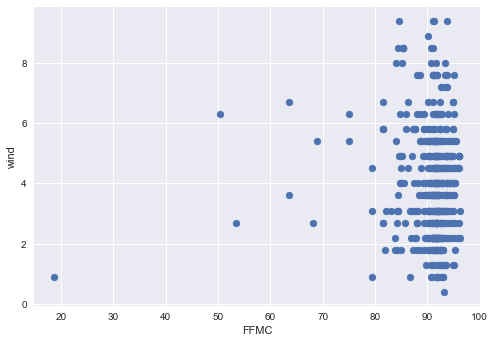

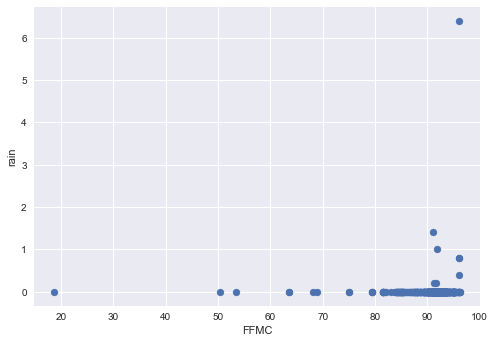

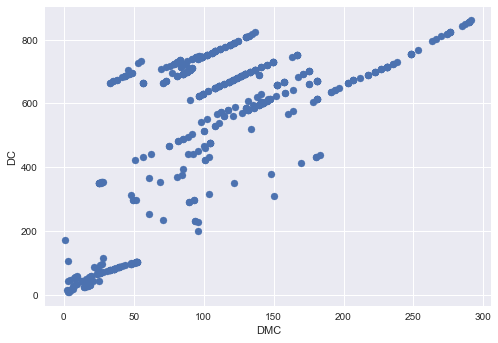

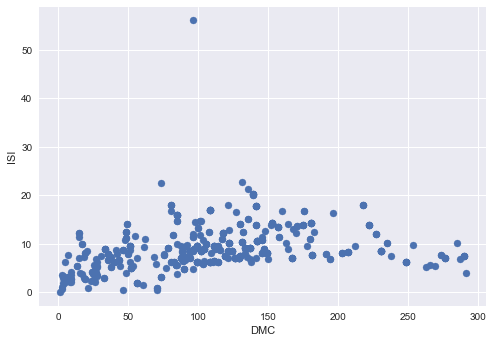

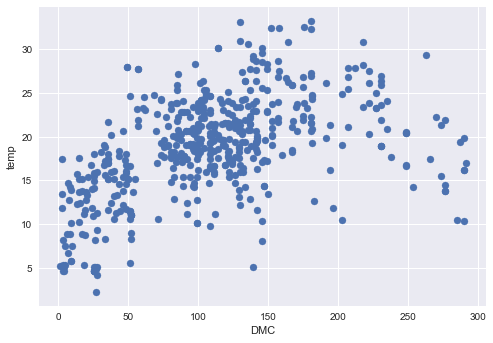

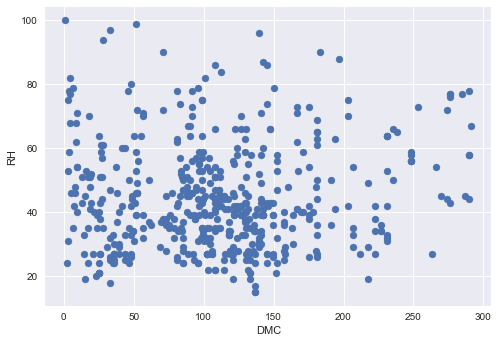

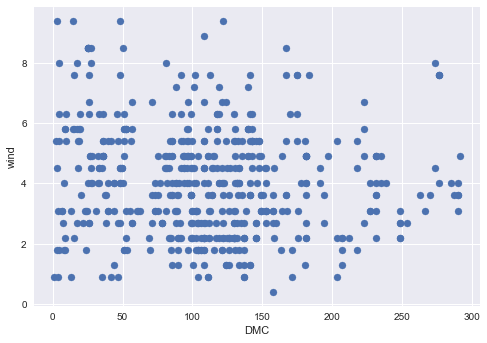

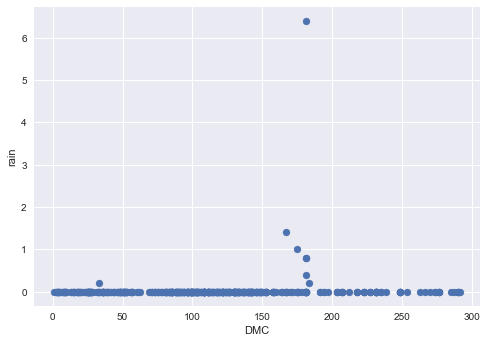

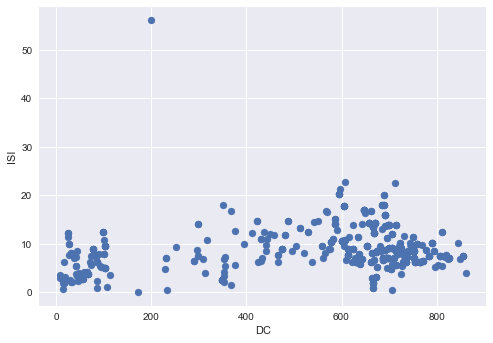

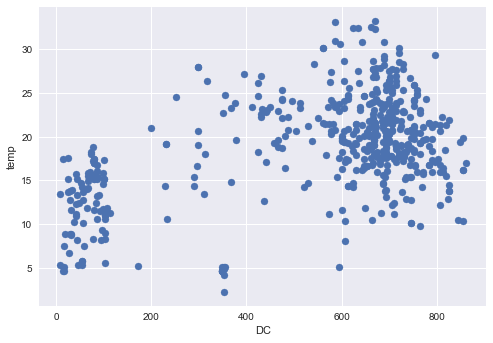

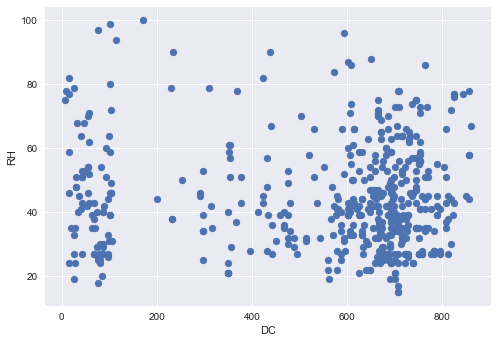

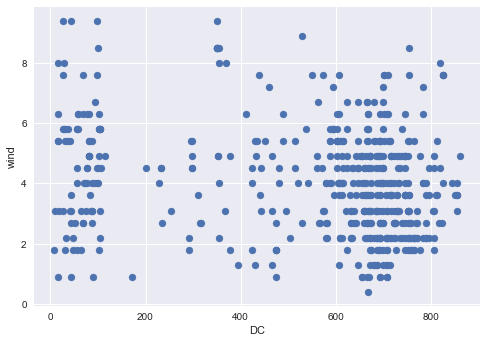

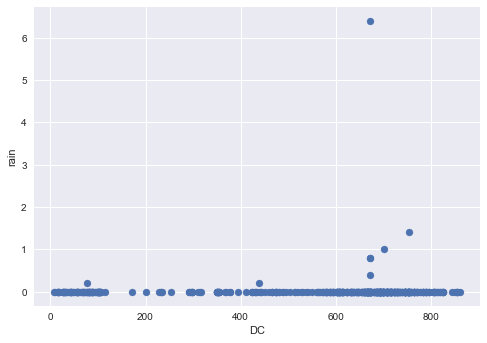

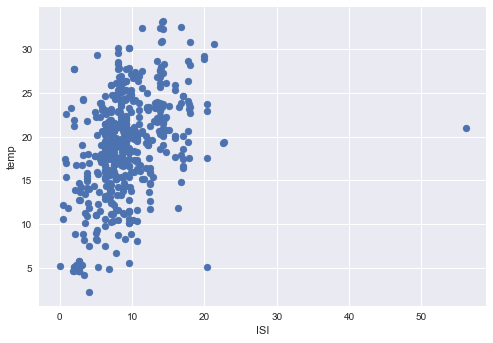

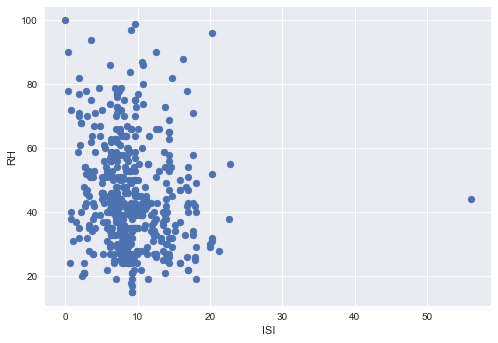

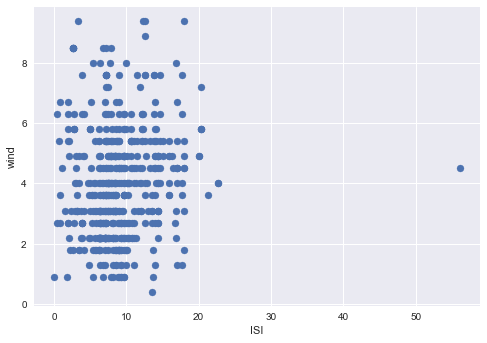

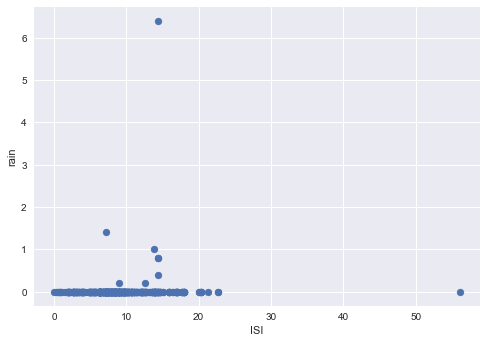

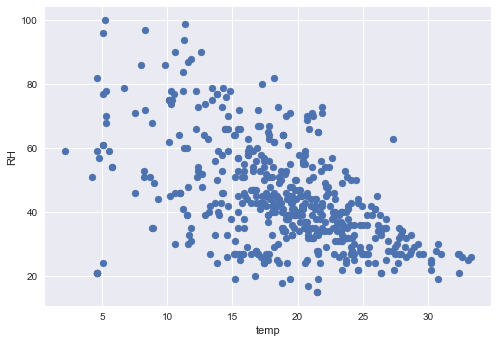

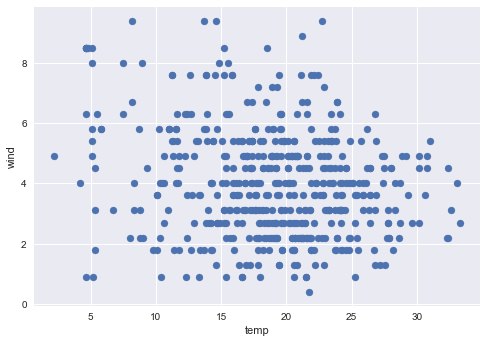

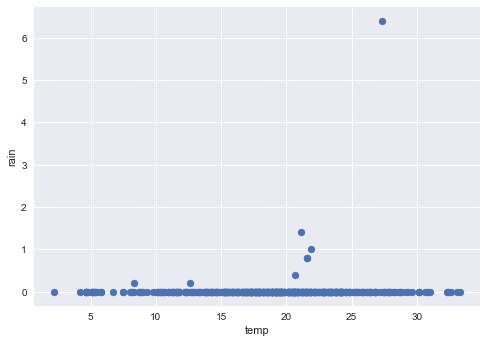

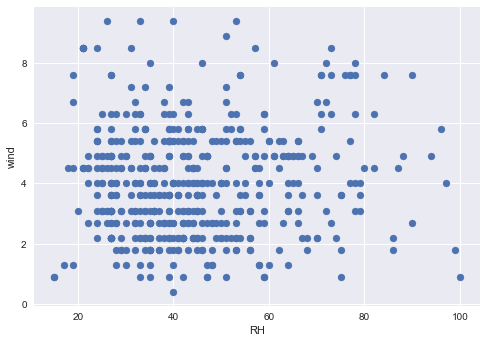

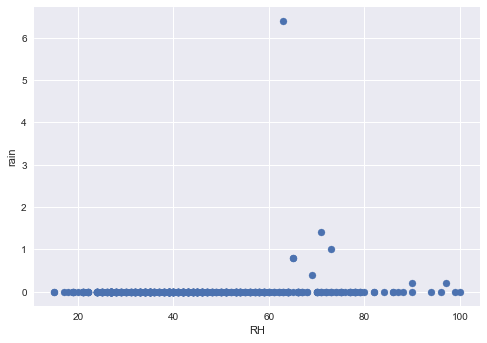

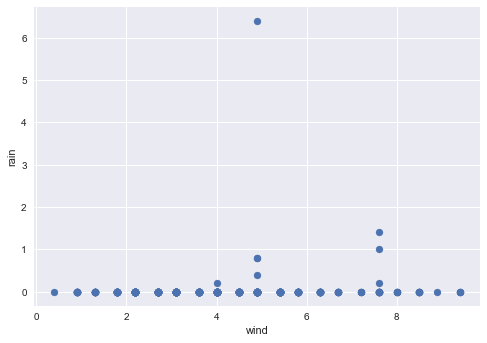

In [66]:
for i in range(4,12):
    for j in range(5,12):
        if(i<j):
            if(ff.dtypes[i]=='object'):
                sns.swarmplot(np.array(ff.ix[:,i]).values.reshape(517,),np.array(ff.ix[:,j]).values.reshape(517,))
                plt.xlabel(ff.columns[i])
                plt.ylabel(ff.columns[j])
                plt.show()
            elif((ff.dtypes[i]!='object')and (ff.dtypes[i]!='object')):
                plt.scatter(np.array(ff.ix[:,i]).reshape(517,),np.array(ff.ix[:,j].reshape(517,)))
                plt.xlabel(ff.columns[i])
                plt.ylabel(ff.columns[j])
                plt.show()

2.(b)iv  The scatter plots of  predictors taken pairwise.

2(b).v

In [64]:
fd=ff.describe()
fd=fd.drop(["count","std"],axis=0)
fd.loc["IQR"]=fd.loc["75%"]-fd.loc["25%"]

print("2(b).v All the numeric attributes have been summarized in this table")
print(fd)

2(b).v All the numeric attributes have been summarized in this table
           FFMC        DMC          DC        ISI       temp          RH  \
mean  90.644681  110.87234  547.940039   9.021663  18.889168   44.288201   
min   18.700000    1.10000    7.900000   0.000000   2.200000   15.000000   
25%   90.200000   68.60000  437.700000   6.500000  15.500000   33.000000   
50%   91.600000  108.30000  664.200000   8.400000  19.300000   42.000000   
75%   92.900000  142.40000  713.900000  10.800000  22.800000   53.000000   
max   96.200000  291.30000  860.600000  56.100000  33.300000  100.000000   
IQR    2.700000   73.80000  276.200000   4.300000   7.300000   20.000000   

          wind      rain      area  
mean  4.017602  0.021663  1.111026  
min   0.400000  0.000000  0.000000  
25%   2.700000  0.000000  0.000000  
50%   4.000000  0.000000  0.418710  
75%   4.900000  0.000000  2.024193  
max   9.400000  6.400000  6.995620  
IQR   2.200000  0.000000  2.024193  


# 2(c)

2 (c). Whichever of the coefficients have p-value less than 0.05 are statistically significant. There are also plots which show the fitted values on top of the scatter plot.

Intercept    1.592126e-08
C(X)[T.2]    9.240886e-01
C(X)[T.3]    2.943452e-02
C(X)[T.4]    6.768214e-01
C(X)[T.5]    2.713652e-01
C(X)[T.6]    8.946806e-01
C(X)[T.7]    7.960252e-01
C(X)[T.8]    5.188744e-01
C(X)[T.9]    3.211281e-01
dtype: float64
Intercept    0.000109
C(Y)[T.3]    0.157859
C(Y)[T.4]    0.219676
C(Y)[T.5]    0.228511
C(Y)[T.6]    0.111274
C(Y)[T.8]    0.001775
C(Y)[T.9]    0.506150
dtype: float64
Intercept          0.018872
C(month)[T.aug]    0.925964
C(month)[T.dec]    0.023810
C(month)[T.feb]    0.998009
C(month)[T.jan]    0.315642
C(month)[T.jul]    0.991493
C(month)[T.jun]    0.667068
C(month)[T.mar]    0.526347
C(month)[T.may]    0.490256
C(month)[T.nov]    0.456666
C(month)[T.oct]    0.768595
C(month)[T.sep]    0.696195
dtype: float64
Intercept        4.238699e-10
C(day)[T.mon]    5.904144e-01
C(day)[T.sat]    2.352613e-01
C(day)[T.sun]    4.618500e-01
C(day)[T.thu]    8.105418e-01
C(day)[T.tue]    2.618477e-01
C(day)[T.wed]    5.560756e-01
dtype: float64


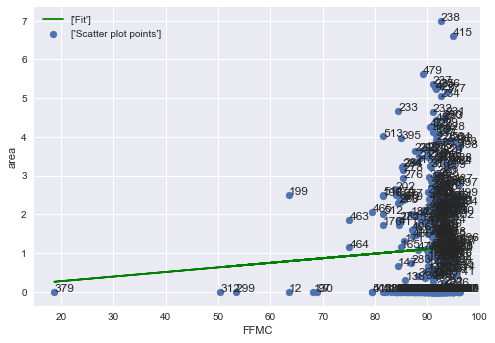

Intercept    0.971364
FFMC         0.288193
dtype: float64


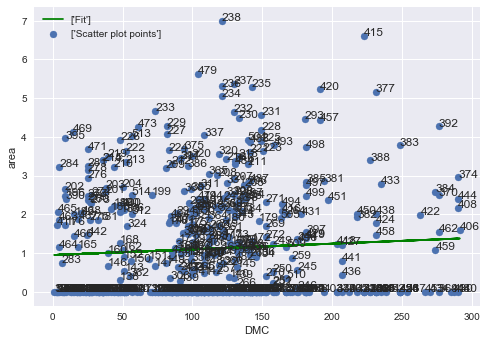

Intercept    6.176579e-14
DMC          1.272790e-01
dtype: float64


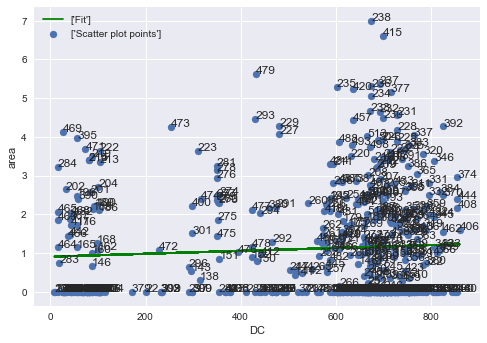

Intercept    2.364749e-09
DC           1.318432e-01
dtype: float64


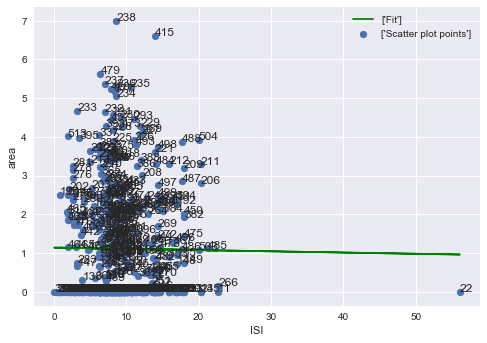

Intercept    6.632032e-16
ISI          8.144413e-01
dtype: float64


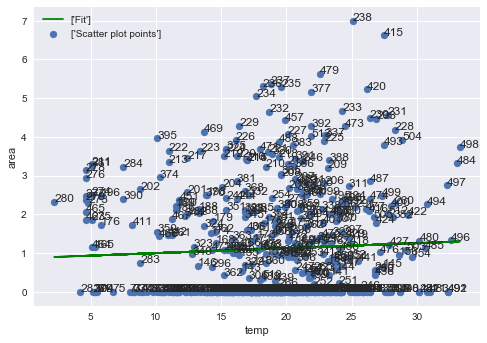

Intercept    0.000040
temp         0.224716
dtype: float64


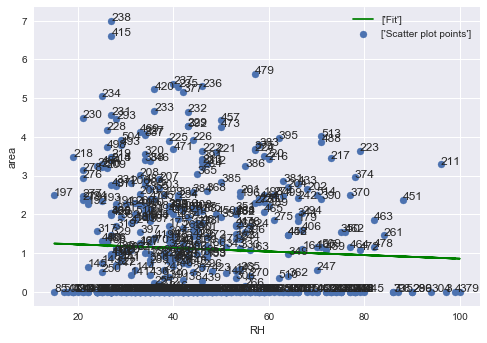

Intercept    6.079554e-13
RH           2.231955e-01
dtype: float64


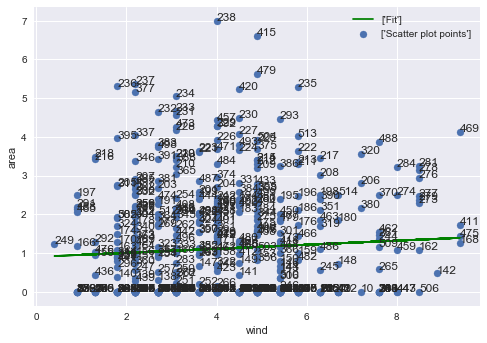

Intercept    4.435629e-09
wind         1.282998e-01
dtype: float64


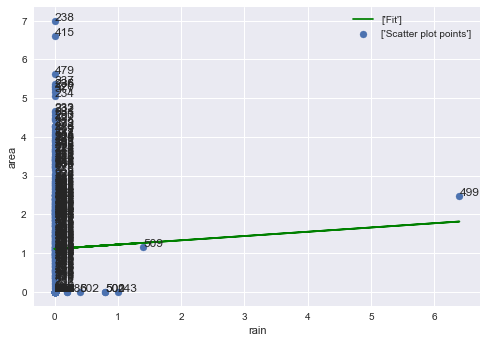

Intercept    2.193695e-56
rain         5.969213e-01
dtype: float64


In [8]:
sing_pvalues=[]
sing_cols=[]
dab=[]
c=0
for i in range(0,12):
    if(ff.dtypes[i]=='object'):
        form='C('+ff.columns[i]+')'
        lm=smf.ols('area~'+form, data = ff).fit()
        
    else:
        form=ff.columns[i]
        lm=smf.ols('area~'+form, data = ff).fit()
        plt.scatter(ff.ix[:,i],ff.ix[:,12],label=['Scatter plot points'])
        plt.plot(ff.ix[:,i],lm.fittedvalues,color='green',label=['Fit'])
        for j, txt in enumerate(ff.index):
            plt.annotate(txt, (ff.ix[j,i],ff.ix[j,12]))
        plt.legend()
        plt.xlabel(ff.columns[i])
        plt.ylabel('area')
        plt.show()
    dab.insert(c,lm.outlier_test())
    print(lm.pvalues)
    for j in range(1,len(lm.pvalues)):
        sing_pvalues.insert(c,lm.pvalues[j])
        c=c+1
    #sing_cols.insert(c,ff.columns.values[i])
    
        

2 (c) From the plots it is easy to identify that there are outliers such as the two points in 'Area' vs 'ISI' graph which can be considered outliers and removed.They are the points 238 and 415. There is also the outlier test which can be performed. The results are below.

In [106]:
for i in range(0,12):
    print(ff.columns[i])
    print(dab[i])

X
     student_resid   unadj_p  bonf(p)
0        -0.785302  0.432643      1.0
1        -0.785302  0.432643      1.0
2        -0.785302  0.432643      1.0
3        -0.961501  0.336759      1.0
4        -0.961501  0.336759      1.0
5        -0.961501  0.336759      1.0
6        -0.961501  0.336759      1.0
7        -0.961501  0.336759      1.0
8        -0.961501  0.336759      1.0
9        -0.785302  0.432643      1.0
10       -0.785302  0.432643      1.0
11       -0.785302  0.432643      1.0
12       -0.857751  0.391435      1.0
13       -0.857751  0.391435      1.0
14       -0.857751  0.391435      1.0
15       -0.857751  0.391435      1.0
16       -0.582249  0.560658      1.0
17       -0.961501  0.336759      1.0
18       -0.857751  0.391435      1.0
19       -0.857751  0.391435      1.0
20       -0.857751  0.391435      1.0
21       -0.582249  0.560658      1.0
22       -0.785302  0.432643      1.0
23       -0.785302  0.432643      1.0
24       -0.785302  0.432643      1.0
25       -

# 2(d)

In [9]:
mod4=smf.ols('area~C(X)+C(Y)+C(month)+C(day)+FFMC+DMC+DC+ISI+temp+RH+wind+rain', data = ff).fit() 
mod4.pvalues

Intercept          0.832078
C(X)[T.2]          0.878188
C(X)[T.3]          0.015066
C(X)[T.4]          0.830145
C(X)[T.5]          0.102909
C(X)[T.6]          0.947635
C(X)[T.7]          0.426133
C(X)[T.8]          0.765283
C(X)[T.9]          0.008090
C(Y)[T.3]          0.194048
C(Y)[T.4]          0.065956
C(Y)[T.5]          0.225216
C(Y)[T.6]          0.308659
C(Y)[T.8]          0.003630
C(Y)[T.9]          0.016232
C(month)[T.aug]    0.457712
C(month)[T.dec]    0.009635
C(month)[T.feb]    0.524177
C(month)[T.jan]    0.690026
C(month)[T.jul]    0.562920
C(month)[T.jun]    0.632587
C(month)[T.mar]    0.602859
C(month)[T.may]    0.470802
C(month)[T.nov]    0.427408
C(month)[T.oct]    0.220278
C(month)[T.sep]    0.152392
C(day)[T.mon]      0.793734
C(day)[T.sat]      0.272942
C(day)[T.sun]      0.318314
C(day)[T.thu]      0.880572
C(day)[T.tue]      0.238849
C(day)[T.wed]      0.879088
FFMC               0.602157
DMC                0.016714
DC                 0.060758
ISI                0

For all the coefficients which have p-value <0.05 we can reject the null hypothesis. Only the for the coefficients of X=3,X=9,Y=8,month=December and DMC we   reject the null hypothesis.

# 2(e) 

[ 0.87818838  0.0150658   0.8301446   0.10290867  0.94763465  0.42613252
  0.76528252  0.00809047  0.19404835  0.06595574  0.22521559  0.30865885
  0.00362976  0.01623153  0.45771189  0.00963505  0.52417671  0.69002631
  0.56292049  0.632587    0.60285888  0.47080179  0.42740825  0.22027833
  0.15239199  0.79373371  0.27294168  0.31831437  0.88057165  0.23884891
  0.87908807  0.60215676  0.01671425  0.06075847  0.70764181  0.52898329
  0.68174553  0.11323924  0.56861541] [ 0.9240886   0.02943452  0.67682144  0.2713652   0.89468064  0.79602523
  0.51887437  0.3211281   0.15785889  0.21967641  0.22851127  0.11127382
  0.00177488  0.50615013  0.92596362  0.02381041  0.99800946  0.31564227
  0.99149342  0.66706804  0.52634666  0.49025636  0.45666609  0.76859463
  0.69619537  0.59041441  0.2352613   0.46185     0.81054182  0.26184772
  0.5560756   0.28819256  0.12727898  0.13184322  0.8144413   0.22471601
  0.2231955   0.12829983  0.59692131]


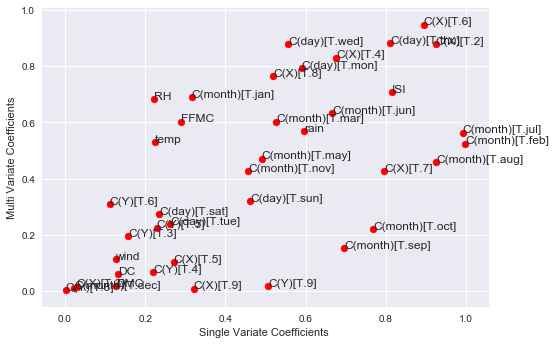

In [10]:
y1=pd.DataFrame(sing_pvalues)
x1=pd.DataFrame(mod4.pvalues)
col_name=x1.index
col_name=col_name[1:len(col_name)]
col_name=list(col_name)
x1=x1.iloc[1:len(mod4.pvalues),]
x1=pd.DataFrame(x1.ix[:,0])
x1=np.array(x1)
y1=np.array(y1)
x1=x1.reshape(39,)
y1=y1.reshape(39,)
print(x1,y1)
plt.scatter(y1,x1,c='r')
for i,txt in enumerate(col_name):
    plt.annotate(col_name[i],(y1[i],x1[i]))    
plt.xlabel("Single Variate Coefficients ")
plt.ylabel('Multi Variate Coefficients')
plt.show()
#plt.scatter(x1.ix[:,0],y1.ix[:,0],cmap=sing_cols)


The coefficients for multivariate and single variate regression have been plotted on the y-axis and x-axis respectively.

# 2(f)

In [290]:
for i in range(0,12):
    poly = PolynomialFeatures(degree=3)
    X= poly.fit_transform(np.array(ff.ix[:,i]).reshape(517,1))
    m=sm.OLS(exog=X,endog=ff.area).fit()
    print(m.pvalues)
    

const    0.002838
x1       0.583974
x2       0.676338
x3       0.830375
dtype: float64
const    0.482948
x1       0.960030
x2       0.883686
x3       0.770753
dtype: float64
const    0.725881
x1       0.477035
x2       0.396048
x3       0.258973
dtype: float64
const    0.070532
x1       0.371585
x2       0.310550
x3       0.280335
dtype: float64
const    0.991320
x1       0.919345
x2       0.816936
x3       0.775932
dtype: float64
const    0.000085
x1       0.912432
x2       0.878149
x3       0.841921
dtype: float64
const    0.010020
x1       0.247389
x2       0.307851
x3       0.331887
dtype: float64
const    0.000396
x1       0.852027
x2       0.904615
x3       0.993065
dtype: float64
const    0.000098
x1       0.018486
x2       0.043054
x3       0.107224
dtype: float64
const    0.069893
x1       0.465697
x2       0.452125
x3       0.409393
dtype: float64
const    0.841558
x1       0.057533
x2       0.054727
x3       0.045467
dtype: float64
const    4.556054e-57
x1       9.196225e-02

For all the predictors and their polynomial features the pvalues have been listed.All the p-values less than 0.05 are statiscally significant.

# 2(h)

In [39]:
ad=ff.select_dtypes(include=['object'])
ad=pd.get_dummies(ad)
ad1=ff.select_dtypes(exclude=['object'])
ad=pd.concat((ad,ad1),axis=1,join='outer')
ad=ad.drop(['area'],axis=1)

In [40]:
count=0
for i in range(0,43):
    for j in range(1,43):
        if(i<=j):
            ad[ad.columns[i]+','+ad.columns[j]]=ad.ix[:,i]*ad.ix[:,j]
            count=count+1 
m=sm.OLS(exog=ad,endog=ff.area).fit()
print(m.pvalues<0.05)    

X_1          False
X_2          False
X_3          False
X_4          False
X_5          False
X_6          False
X_7          False
X_8          False
X_9          False
Y_2          False
Y_3          False
Y_4          False
Y_5          False
Y_6          False
Y_8          False
Y_9          False
month_apr    False
month_aug    False
month_dec    False
month_feb    False
month_jan    False
month_jul    False
month_jun    False
month_mar    False
month_may    False
month_nov    False
month_oct    False
month_sep    False
day_fri      False
day_mon      False
             ...  
FFMC,wind    False
FFMC,rain    False
DMC,DMC      False
DMC,DC       False
DMC,ISI      False
DMC,temp     False
DMC,RH       False
DMC,wind     False
DMC,rain     False
DC,DC        False
DC,ISI       False
DC,temp      False
DC,RH        False
DC,wind      False
DC,rain      False
ISI,ISI      False
ISI,temp     False
ISI,RH       False
ISI,wind     False
ISI,rain     False
temp,temp    False
temp,RH     

C:\Users\Abhi\Anaconda3\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Abhi\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Abhi\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Abhi\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


As we can see the p-values for the various coefficients in the list above .The ones which are statiscally significant are Listed as True

In [38]:
X=ad
y=ff['area']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)
modL=LinearRegression()
modL.fit(X_train,y_train)
ypred=modL.predict(X_test)
ypred1=modL.predict(X_train)
print('The Train error is {0}'.format(metrics.mean_squared_error(y_train,ypred1)))
print('The Test error is {0}'.format(metrics.mean_squared_error(y_test,ypred)))

The Train error is 0.5748256232687082
The Test error is 30552319.35171583


# 2(i)

(-0.041101694915254242,
 1.0495762711864407,
 2028.5809350948421,
 8563.7555808074467)

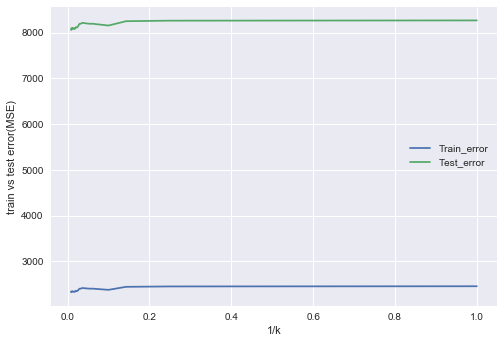

In [47]:
X=ff.drop(['area'],axis=1)
X=X.replace(({'month':{ "jan":1, "feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}}))
X=X.replace(({'day':{"sun":1,"mon":2,"tue":3,"wed":4,"thu":5,"fri":6,"sat":7}}))
y=ff['area']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)
train_error=[]
test_error=[]
ad=X_train.ix[:,0:4]
ad1=X_test.ix[:,0:4]
i=0
for k in np.arange(1,121,3):        
    mod1=KNeighborsRegressor(metric="matching",n_neighbors=k)        
    mod1.fit(ad,y_train)
    ypred1=mod1.predict(ad1)
    ypred=mod1.predict(ad)
    train_error.insert(i,metrics.mean_squared_error(y_train,ypred))
    test_error.insert(i,metrics.mean_squared_error(y_test,ypred1))
    i=i+1
    
x1=np.array(train_error[::-1])
y1=np.array(test_error[::-1])
df=np.array(sorted(np.arange(1,121,3),reverse=True))
df=1/df
plt.plot(df,x1,label='Train_error')
plt.plot(df,y1,label='Test_error')
plt.xlabel('1/k')
plt.ylabel('train vs test error(MSE)')
plt.legend()
plt.axis('tight')
#x1=x1.reshape(40,)
#y1=y1.reshape(40,)
#print(i)    

(-0.041101694915254242,
 1.0495762711864407,
 -259.12659013919443,
 5491.5273469397043)

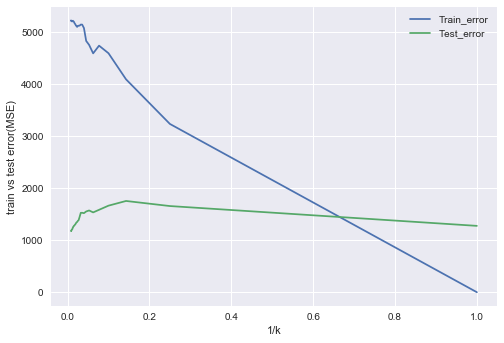

In [44]:
train_error=[]
test_error=[]
ad=X_train.ix[:,8:12]
ad1=X_test.ix[:,8:12]
i=0
for k in np.arange(1,121,3):        
    mod1=KNeighborsRegressor(metric="euclidean",n_neighbors=k)        
    mod1.fit(ad,y_train)
    ypred1=mod1.predict(ad1)
    ypred=mod1.predict(ad)
    train_error.insert(i,metrics.mean_squared_error(y_train,ypred))
    test_error.insert(i,metrics.mean_squared_error(y_test,ypred1))
    i=i+1
    
x1=np.array(train_error[::-1])
y1=np.array(test_error[::-1])
df=np.array(sorted(np.arange(1,121,3),reverse=True))
df=1/df
plt.plot(df,x1,label='Train_error')
plt.plot(df,y1,label='Test_error')
plt.xlabel('1/k')
plt.ylabel('train vs test error(MSE)')
plt.legend()
plt.axis('tight')
    

(-0.041101694915254242,
 1.0495762711864407,
 -464.39860310887445,
 9769.169773873622)

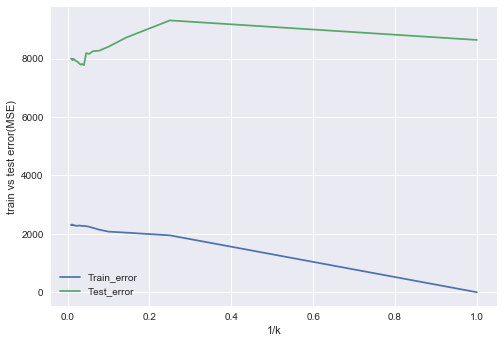

In [55]:
train_error=[]
test_error=[]
ad=X_train.ix[:,[0,1,7,8,9]]
ad1=X_test.ix[:,[0,1,7,8,9]]
i=0
for k in np.arange(1,121,3):        
    mod1=KNeighborsRegressor(metric=("euclidean"),n_neighbors=k)        
    mod1.fit(ad,y_train)
    ypred1=mod1.predict(ad1)
    ypred=mod1.predict(ad)
    train_error.insert(i,metrics.mean_squared_error(y_train,ypred))
    test_error.insert(i,metrics.mean_squared_error(y_test,ypred1))
    i=i+1
    
x1=np.array(train_error[::-1])
y1=np.array(test_error[::-1])
df=np.array(sorted(np.arange(1,121,3),reverse=True))
df=1/df
plt.plot(df,x1,label='Train_error')
plt.plot(df,y1,label='Test_error')
plt.xlabel('1/k')
plt.ylabel('train vs test error(MSE)')
plt.legend()
plt.axis('tight')

# 2(j)

After comparing all the results in Knn Regression I found that the error rate was definitely lower when having only categorical variables. Using Numerical Variables generally led to more error in the testing data.
This was because the distance between the neighbours decreases in case of categorical variables as it is very difficult to find a match if number of unique classes is greater than 10. 
Whereas incase of numerical attributes with any distance metric the error keeps increasing.


# The end